In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Cars Datasets 2025.csv', encoding='latin1')

In [ ]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [ ]:
df.shape

(1218, 11)

In [ ]:
def extract_number(x):
  if pd.isna(x): return np.nan
  import re
  nums = re.findall(r'\d+\.?\d*',str(x).replace(',',''))
  return float(nums[0]) if nums else np.nan

In [ ]:
df.describe().T

,count,unique,top,freq
Company Names,1218,37,Nissan,149
Cars Names,1218,1201,Mistral,2
Engines,1218,356,I4,64
CC/Battery Capacity,1215,311,1984 cc,31
HorsePower,1218,456,355 hp,23
Total Speed,1218,114,250 km/h,145
Performance(0 - 100 )KM/H,1212,180,6.5 sec,45
Cars Prices,1218,535,"$35,000",36
Fuel Types,1218,23,Petrol,871
Seats,1218,19,5,692


<Axes: xlabel='count', ylabel='Company Names'>

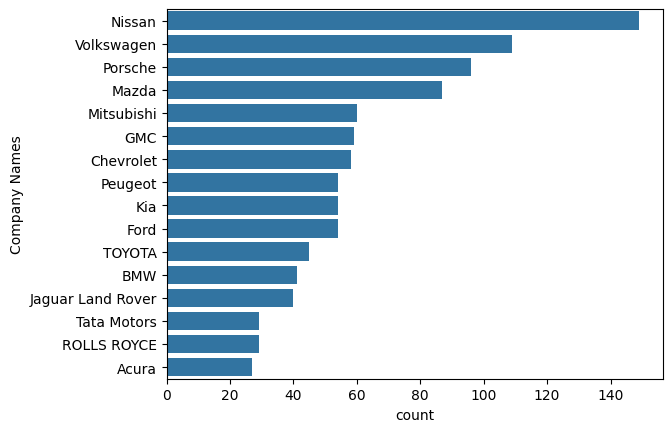

In [ ]:
sns.countplot(y='Company Names',data=df,order=df['Company Names'].value_counts().index[:16])

TypeError: 'Axes' object is not subscriptable

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


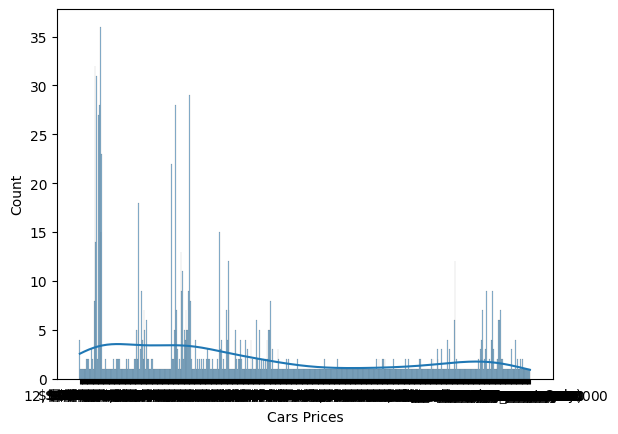

In [ ]:
sns.histplot(df['Cars Prices'],bins=30,kde=True)[:15]

<Axes: ylabel='Engines'>

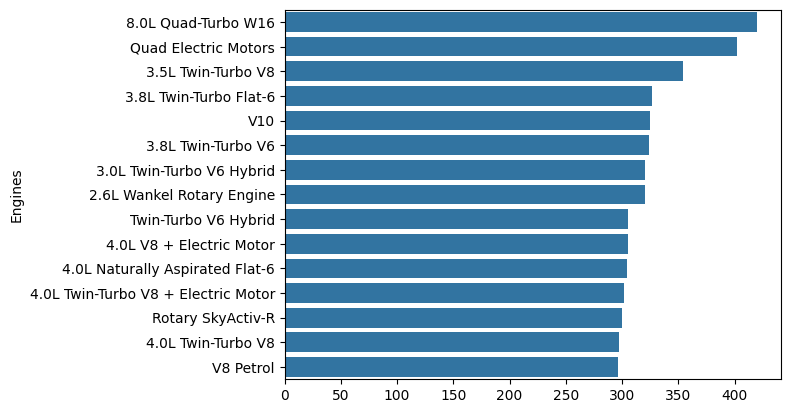

In [ ]:
df['Total Speed Numeric'] = df['Total Speed'].apply(extract_number)
company_hp = df.groupby('Engines')['Total Speed Numeric'].mean().sort_values(ascending=False)[:15]
sns.barplot(x=company_hp.values,y=company_hp.index)

<Axes: ylabel='Cars Names'>

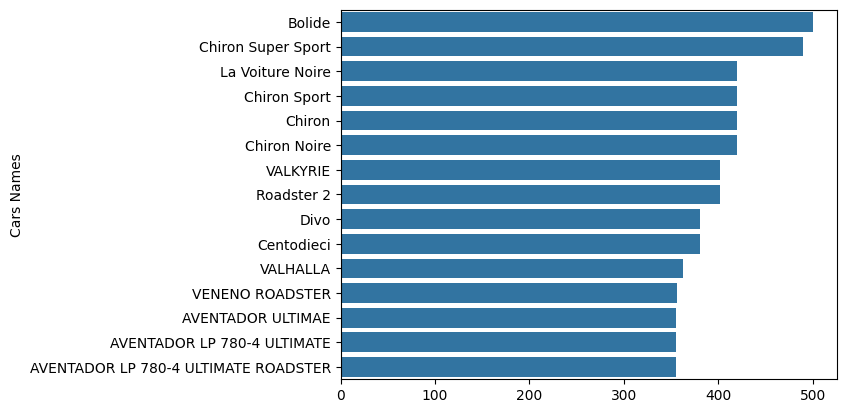

In [ ]:
df['Total Speed Numeric'] = df['Total Speed'].apply(extract_number)
company_hp = df.groupby('Cars Names')['Total Speed Numeric'].mean().sort_values(ascending=False)[:15]
sns.barplot(x=company_hp.values,y=company_hp.index)

<Axes: ylabel='Company Names'>

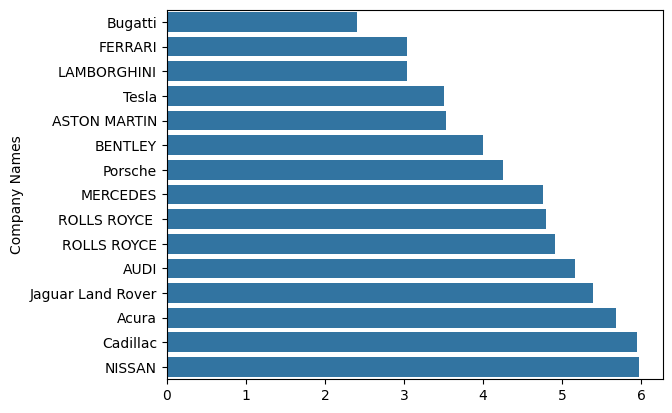

In [ ]:
df['Performance Numeric'] = df['Performance(0 - 100 )KM/H'].apply(extract_number)
company_hp = df.groupby('Company Names')['Performance Numeric'].mean().sort_values(ascending=True)[:15]
sns.barplot(x=company_hp.values,y=company_hp.index)

In [ ]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,Total Speed Numeric,Performance Numeric
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm,340.0,2.5
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm,250.0,5.3
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm,165.0,10.5
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm,250.0,3.2
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm,320.0,3.6


Let's first find the top occurring engines.

In [ ]:
top_engines = df['Engines'].value_counts().nlargest(15).index
print(top_engines)

Index(['I4', 'V12', 'V6', 'Inline-4', 'V8', 'Dual Electric Motors',
       'Electric Motor', '2.0L Inline-4', '1.6L Inline-4', '5.6L V8',
       '5.3L V8 Gasoline', '2.0L I4 Turbo', '3.0L Twin-Turbo Flat-6',
       'Electric', '6.2L V8 Gasoline'],
      dtype='object', name='Engines')


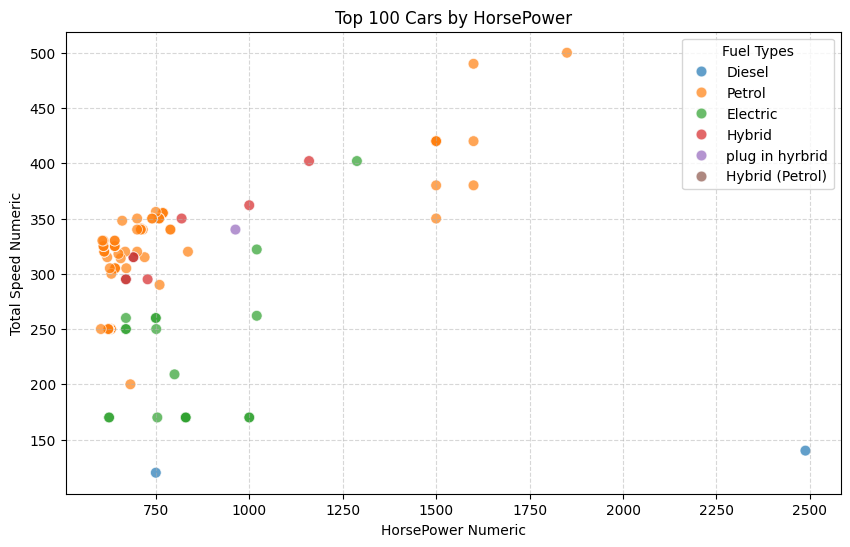

In [ ]:
# Pick top 100 cars by HorsePower
df['HorsePower Numeric'] = df['HorsePower'].apply(extract_number)
top_df = df.nlargest(100, 'HorsePower Numeric')

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='HorsePower Numeric',
    y='Total Speed Numeric',
    data=top_df,
    hue='Fuel Types',
    alpha=0.7,
    s=60
)
plt.title("Top 100 Cars by HorsePower")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

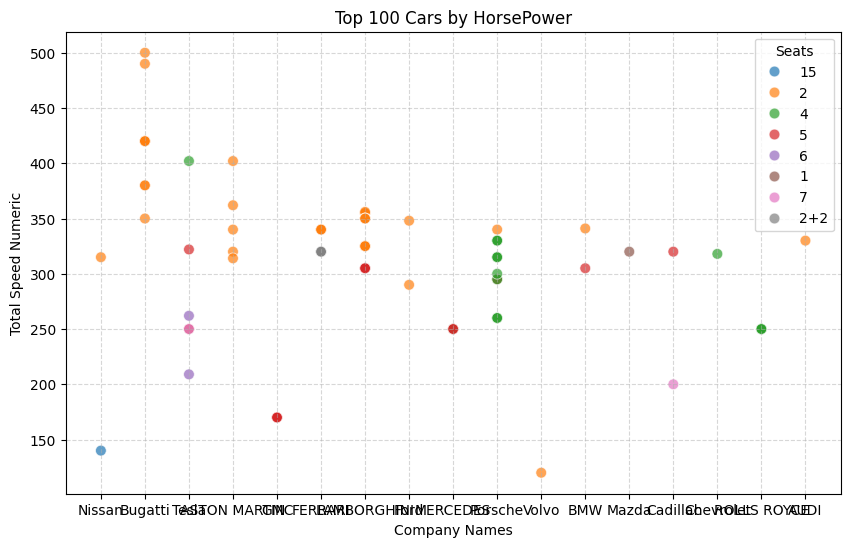

In [ ]:
# Pick top 100 cars by HorsePower
df['HorsePower Numeric'] = df['HorsePower'].apply(extract_number)
top_df = df.nlargest(100, 'HorsePower Numeric')

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Company Names',
    y='Total Speed Numeric',
    data=top_df,
    hue='Seats',
    alpha=0.7,
    s=60
)
plt.title("Top 100 Cars by HorsePower")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

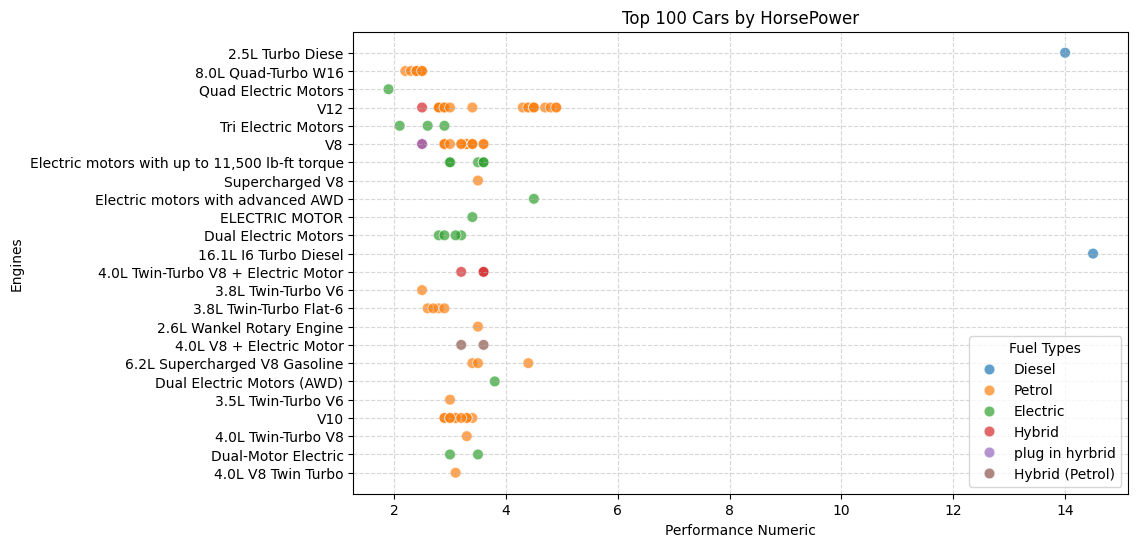

In [ ]:
# Pick top 100 cars by HorsePower
df['HorsePower Numeric'] = df['HorsePower'].apply(extract_number)
top_df = df.nlargest(100, 'HorsePower Numeric')

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Performance Numeric',
    y='Engines',
    data=top_df,
    hue='Fuel Types',
    alpha=0.7,
    s=60
)
plt.title("Top 100 Cars by HorsePower")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


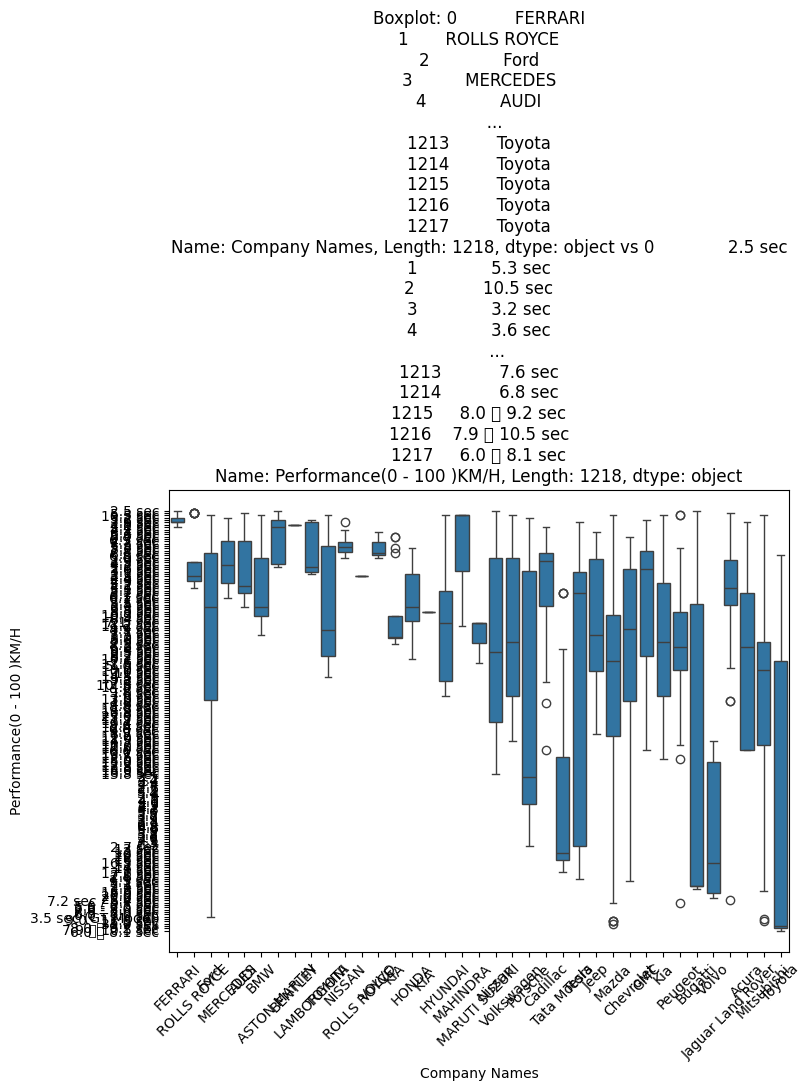

In [ ]:
cat = df['Company Names']
num = df['Performance(0 - 100 )KM/H']

plt.figure(figsize=(8,6))
sns.boxplot(data=df,x=cat,y=num)
plt.title(f"Boxplot: {cat} vs {num}")
plt.xticks(rotation=45)
plt.show()